In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp

# Actividad 06: Diferenciación númerica

---
### Profesor: Juan Marcos Marín
### Nombre: ______
---

# 1.
Implementar el método de la derivada de cinco puntos a través de una función llamada `five_point_derivative`. Luego,
* Calcule el valor para $f(x) = \cos(x)$ utilizando un arreglo con 10 datos $[0\leq x\leq 2\pi]$ y encuentre $f'(\pi/8)$ variando el $h$ y encuentre el error de convergencia, comparando su respuesta con el valor exacto.

* Determine $f''(\pi/8)$ con $h = 0.05$ y encuentre el error de su aproximación. ¿Mejorará con un $h$ menor o mayor?



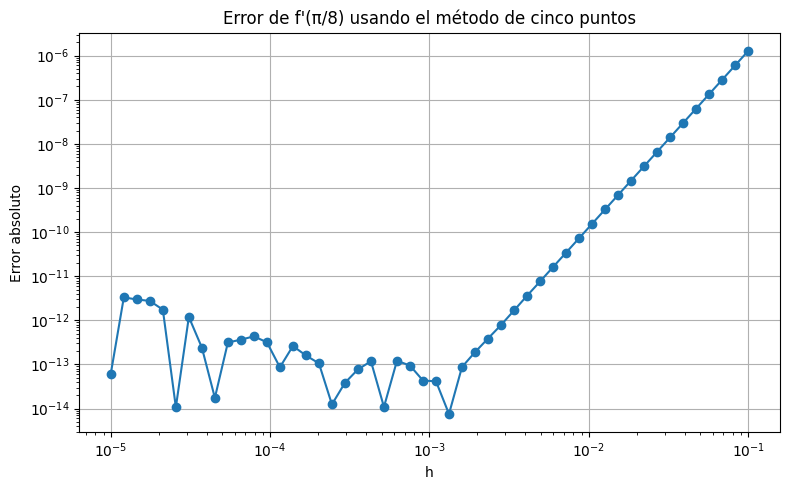

---- Evaluación de segunda derivada ----
f''(π/8) ≈ -0.9238794683673055
Valor exacto: -0.9238795325112867
Error absoluto: 6.414398123766318e-08


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ----------------------------
# Métodos de derivación
# ----------------------------

def five_point_derivative(f, x, h):
    """Primera derivada por el método de cinco puntos centrado"""
    return (-f(x + 2*h) + 8*f(x + h) - 8*f(x - h) + f(x - 2*h)) / (12*h)

def five_point_second_derivative(f, x, h):
    """Segunda derivada por el método de cinco puntos centrado"""
    return (-f(x + 2*h) + 16*f(x + h) - 30*f(x) + 16*f(x - h) - f(x - 2*h)) / (12*h**2)

# ----------------------------
# Parte 1: Derivada f'(x) = -sin(x) en pi/8
# ----------------------------

f = np.cos
f_prime_exact = lambda x: -np.sin(x)

x0 = np.pi / 8  # Punto de evaluación
h_vals = np.logspace(-5, -1, 50)  # Valores de h
errors = []

for h in h_vals:
    approx = five_point_derivative(f, x0, h)
    error = abs(approx - f_prime_exact(x0))
    errors.append(error)

# Graficar el error vs h (convergencia)
plt.figure(figsize=(8, 5))
plt.loglog(h_vals, errors, marker='o')
plt.xlabel("h")
plt.ylabel("Error absoluto")
plt.title("Error de f'(π/8) usando el método de cinco puntos")
plt.grid(True)
plt.tight_layout()
plt.show()

# ----------------------------
# Parte 2: Segunda derivada f''(x) = -cos(x) en pi/8 con h = 0.05
# ----------------------------

h = 0.05
approx_second = five_point_second_derivative(f, x0, h)
exact_second = -np.cos(x0)
error_second = abs(approx_second - exact_second)

print("---- Evaluación de segunda derivada ----")
print(f"f''(π/8) ≈ {approx_second}")
print(f"Valor exacto: {exact_second}")
print(f"Error absoluto: {error_second}")


#2.
Considere la función:

$$f(x) = x e^x$$

Encuentre la derivada númerica $f'(x)$ y $f''(x)$ para $x = 2.0$ usando diferencias finitas. Considere un arreglo con 6 puntos $[1.8\leq x\leq 2.2]$.

*   Cambie los valores de $h$ desde 0.01 hasta 0.1 (tomando 10 diferentes) y compare su resultado con el dado por `scipy` y `numpy.gradient`. Realice un gráfico logaritmico de los errores.

*   ¿Cuál será el valor óptimo de $h$?

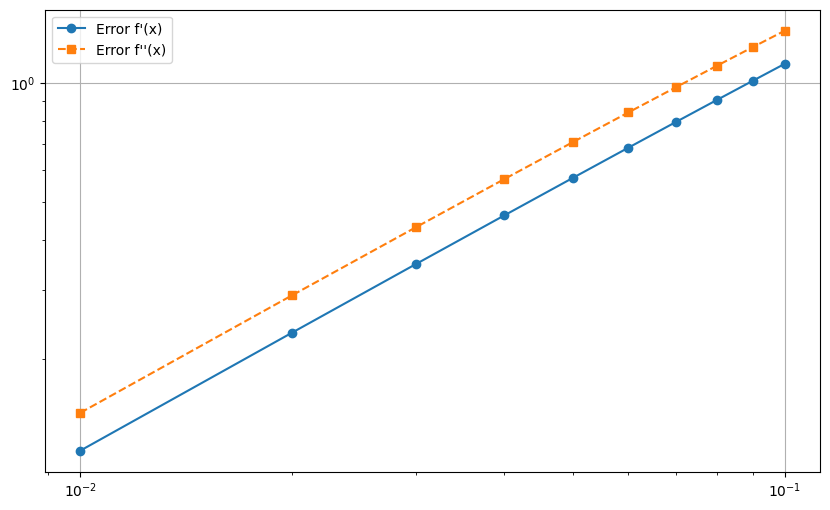

Mejor h para f'(x): 0.01
Mejor h para f''(x): 0.01


In [5]:
import sympy as sp

x = sp.Symbol('x')
f_sym = x * sp.exp(x)

f1_sym = sp.diff(f_sym, x)
f2_sym = sp.diff(f1_sym, x)


f_num = sp.lambdify(x, f_sym, 'numpy')
f1_exact = float(f1_sym.subs(x, 2.0))
f2_exact = float(f2_sym.subs(x, 2.0))

h_values = np.linspace(0.01, 0.1, 10)

errores_f1 = []
errores_f2 = []


for i in h_values:
    x_vals = np.linspace(2.0 - 2*i, 2.0 + 2*i, 6)
    y_vals = f_num(x_vals)

    f1_approx = np.gradient(y_vals, x_vals)[2]
    f2_approx = np.gradient(np.gradient(y_vals, x_vals), x_vals)[2]
    errores_f1.append(abs(f1_approx - f1_exact))
    errores_f2.append(abs(f2_approx - f2_exact))

plt.figure(figsize=(10, 6))
plt.loglog(h_values, errores_f1, 'o-', label="Error f'(x)")
plt.loglog(h_values, errores_f2, 's--', label="Error f''(x)")
plt.grid()
plt.legend()
plt.show()

h_opt_f1 = h_values[np.argmin(errores_f1)]
h_opt_f2 = h_values[np.argmin(errores_f2)]

print(f"Mejor h para f'(x): {h_opt_f1}")
print(f"Mejor h para f''(x): {h_opt_f2}")

